In [3]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from tkinter import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer
import joblib
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.stats import skew, kurtosis
import numpy as np
from sklearn.feature_selection import RFE

# ML PIPELINE

# Data Gathering and Data Analysis
#Data Preprocessing.
#Feature Engineering.
#Feature Selection.
#Model Building.
#Testing and Deployment

In [3]:
# EDA - analyzing data sets to summarize their main characteristics, often with visual methods.

In [ ]:
#Variable Identification - discovering variable types.
#Univariate analysis - individual characteristics of eacg feature.
#Bivariate analysis - relationship between any two variables.
#Missing value Treatment - find out if there is any specific reason why these values are missing and how we treat them.
#Detecting Outliers - understnad the presence of outliers.
#Missing values.
#Detecting Duplicates

In [218]:
data = pd.read_csv('Churn_Modelling.csv')

# Data Discovery

In [62]:
#head

In [ ]:
data.head()

In [64]:
#tail

In [7]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [66]:
#shape of the data set

In [8]:
data.shape

(10000, 14)

In [9]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [10]:
#dataset: no of rows;no of columns;datatypes of each column;memory requirement

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
#Check Null Values In the Dataset (Missing Values)

In [12]:
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [74]:
#Overall Statistics About The Dataset

In [18]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [21]:
#Dropping Irrelevant Features

In [23]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [24]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [25]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univariate Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis

def numeric_univariate(column):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Description
    description = data[column].describe(include="all")
    describe_data = pd.DataFrame(description)
    describe_data.columns = ["value"]
    print(describe_data)
    
    # Boxplot
    sns.boxplot(ax=axes[0], data=data, x=column)
    axes[0].set_title(f"{column} (Boxplot)")
    
    # Distribution
    sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)
    axes[1].set_title(f"{column} (KDE)")
    plt.show()
    
    # Skewness and Kurtosis
    print(f'{column} [Skewness]: {skew(data[column])}')
    print(f'{column} [Kurtosis]: {kurtosis(data[column])}')


              value
count  10000.000000
mean     650.528800
std       96.653299
min      350.000000
25%      584.000000
50%      652.000000
75%      718.000000
max      850.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


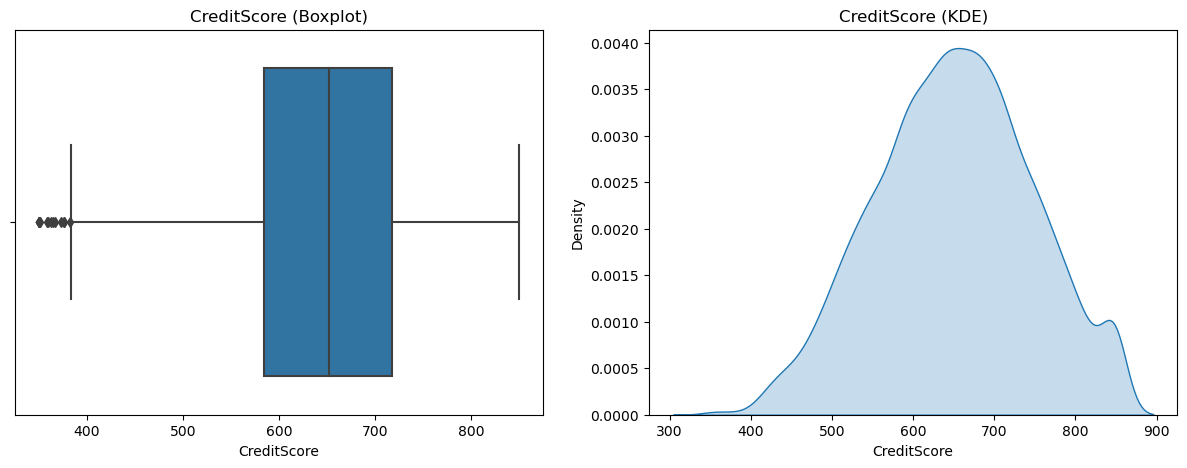

CreditScore [Skewness]: -0.07159586676212397
CreditScore [Kurtosis]: -0.42611279176518124
              value
count  10000.000000
mean      38.921800
std       10.487806
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       92.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


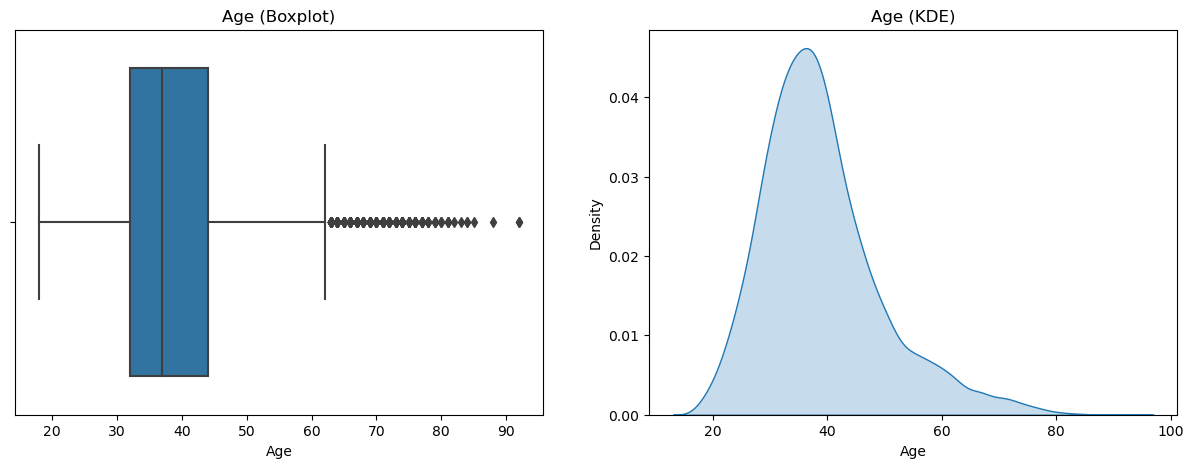

Age [Skewness]: 1.0111685586628079
Age [Kurtosis]: 1.3940495456392599
              value
count  10000.000000
mean       5.012800
std        2.892174
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


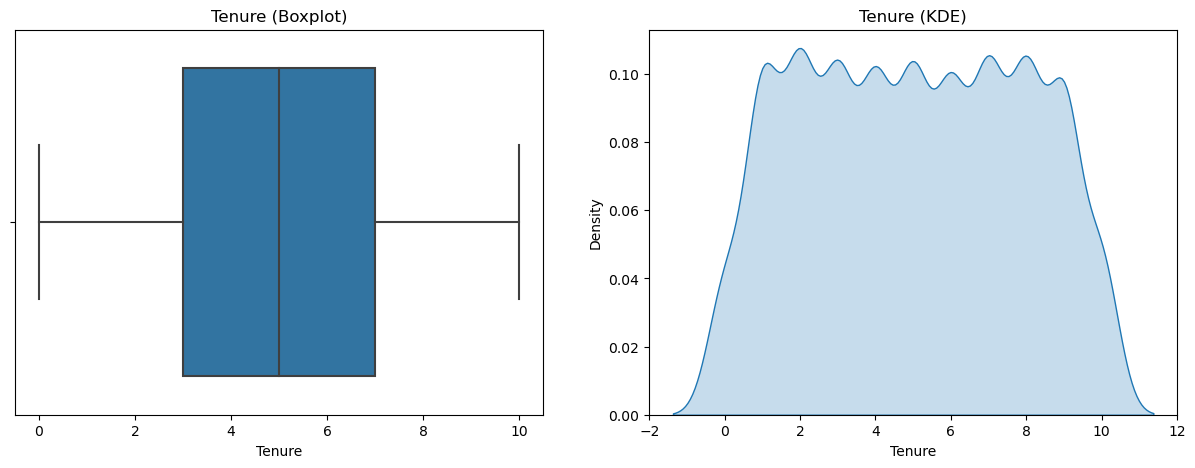

Tenure [Skewness]: 0.010989809189781041
Tenure [Kurtosis]: -1.1652426364413717
               value
count   10000.000000
mean    76485.889288
std     62397.405202
min         0.000000
25%         0.000000
50%     97198.540000
75%    127644.240000
max    250898.090000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


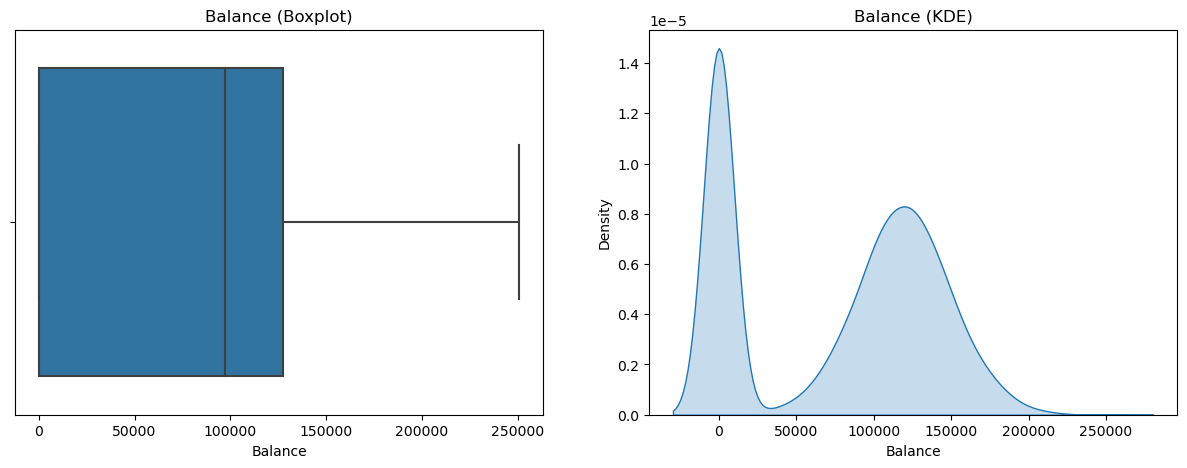

Balance [Skewness]: -0.14108754375291138
Balance [Kurtosis]: -1.489267106315331


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


              value
count  10000.000000
mean       1.530200
std        0.581654
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000


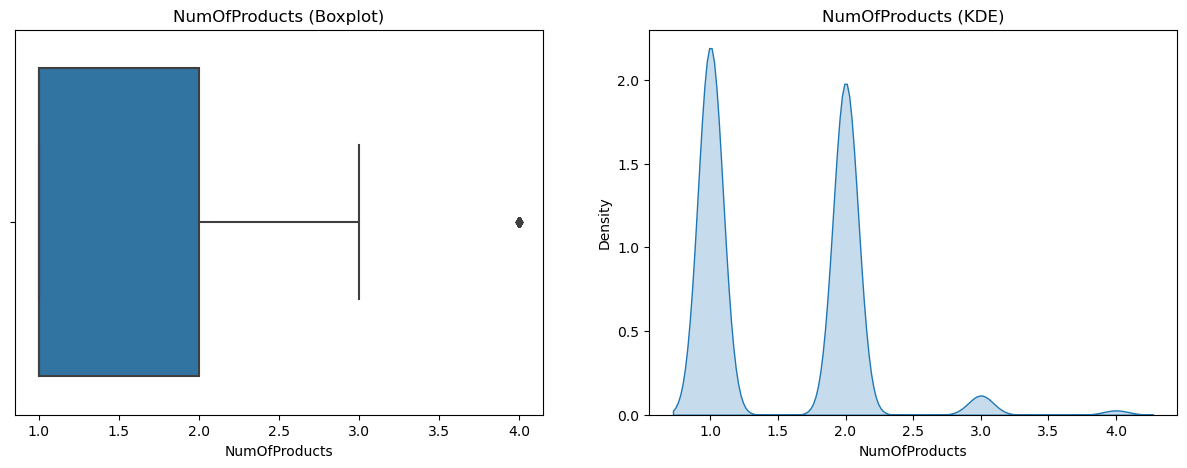

NumOfProducts [Skewness]: 0.745456048438949
NumOfProducts [Kurtosis]: 0.5820893733639854
             value
count  10000.00000
mean       0.70550
std        0.45584
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


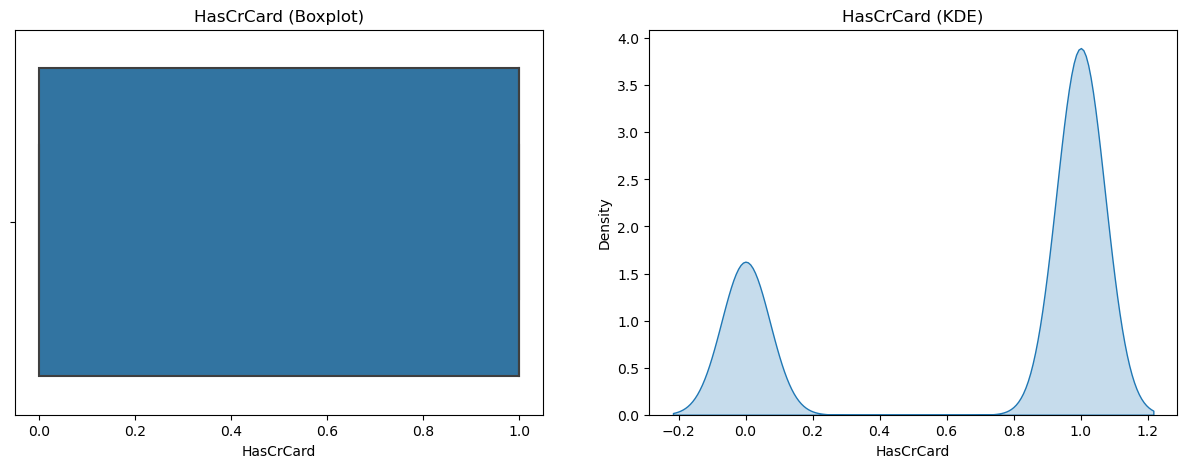

HasCrCard [Skewness]: -0.9016763178640548
HasCrCard [Kurtosis]: -1.18697981780312
              value
count  10000.000000
mean       0.515100
std        0.499797
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


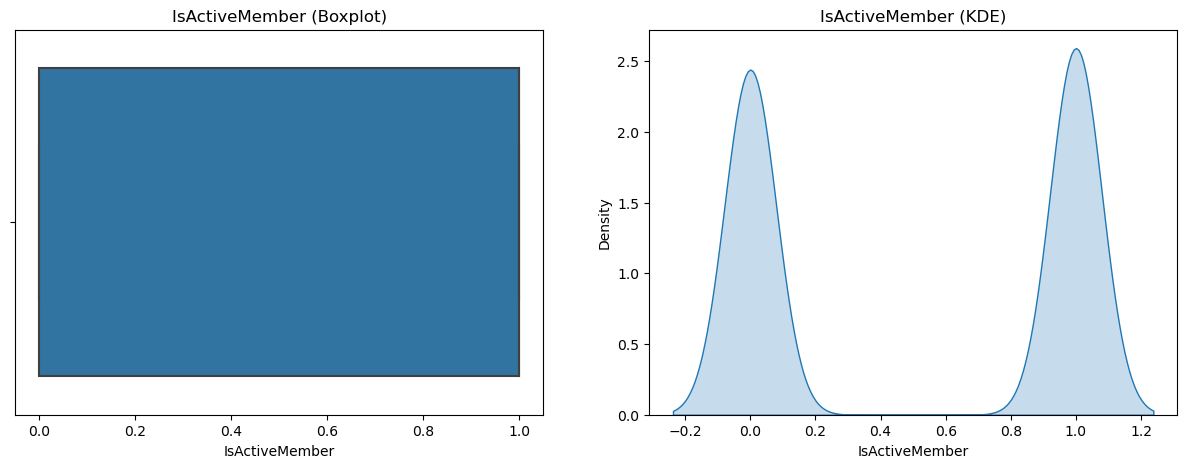

IsActiveMember [Skewness]: -0.06042756246298516
IsActiveMember [Kurtosis]: -1.996348509694782
               value
count   10000.000000
mean   100090.239881
std     57510.492818
min        11.580000
25%     51002.110000
50%    100193.915000
75%    149388.247500
max    199992.480000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


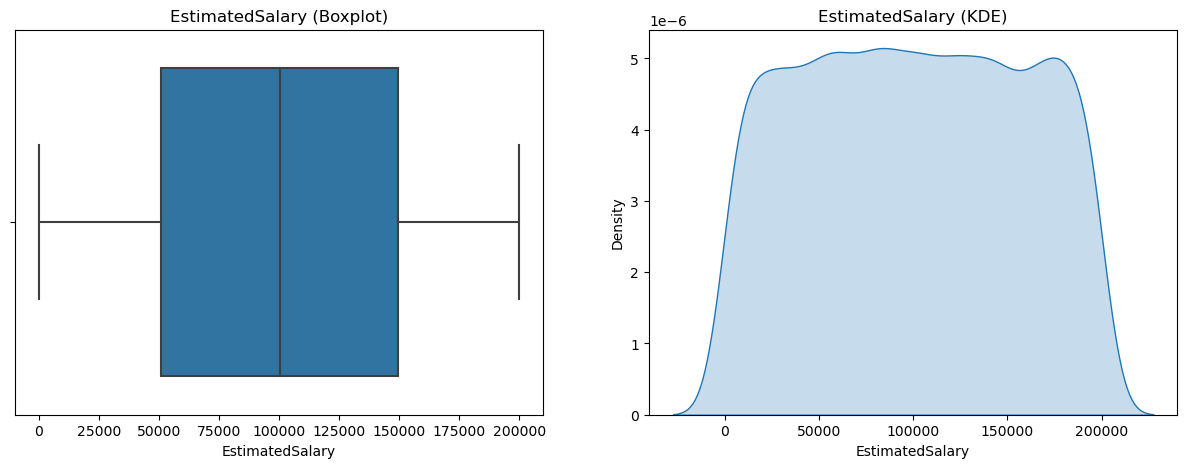

EstimatedSalary [Skewness]: 0.0020850448448748848
EstimatedSalary [Kurtosis]: -1.181527710874237
              value
count  10000.000000
mean       0.203700
std        0.402769
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


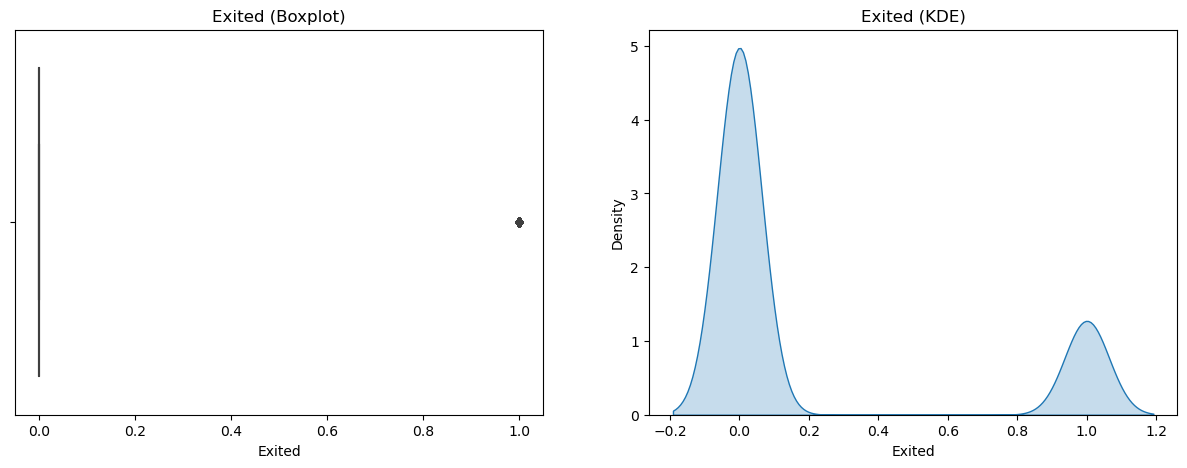

Exited [Skewness]: 1.4713899141398699
Exited [Kurtosis]: 0.16498827943253414


In [49]:
numeric_univariate("CreditScore")
numeric_univariate("Age")
numeric_univariate("Tenure")
numeric_univariate("Balance")
numeric_univariate("NumOfProducts")
numeric_univariate("HasCrCard")
numeric_univariate("IsActiveMember")
numeric_univariate("EstimatedSalary")
numeric_univariate("Exited")

In [ ]:
#Remove Outliers

              value
count  10000.000000
mean     650.528800
std       96.653299
min      350.000000
25%      584.000000
50%      652.000000
75%      718.000000
max      850.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


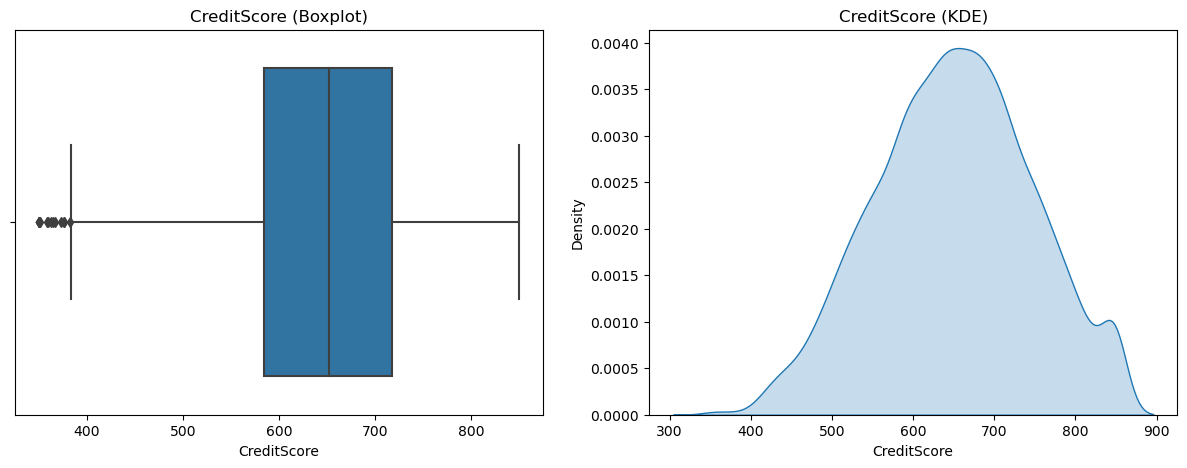

CreditScore [Skewness]: -0.07159586676212397
CreditScore [Kurtosis]: -0.42611279176518124
              value
count  10000.000000
mean      38.921800
std       10.487806
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       92.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


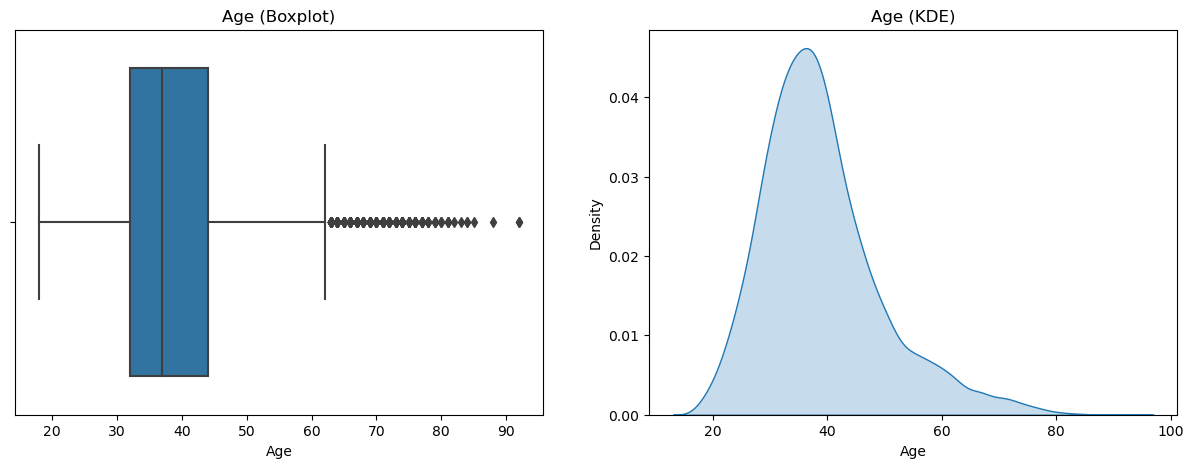

Age [Skewness]: 1.0111685586628079
Age [Kurtosis]: 1.3940495456392599
              value
count  10000.000000
mean       5.012800
std        2.892174
min        0.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       10.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


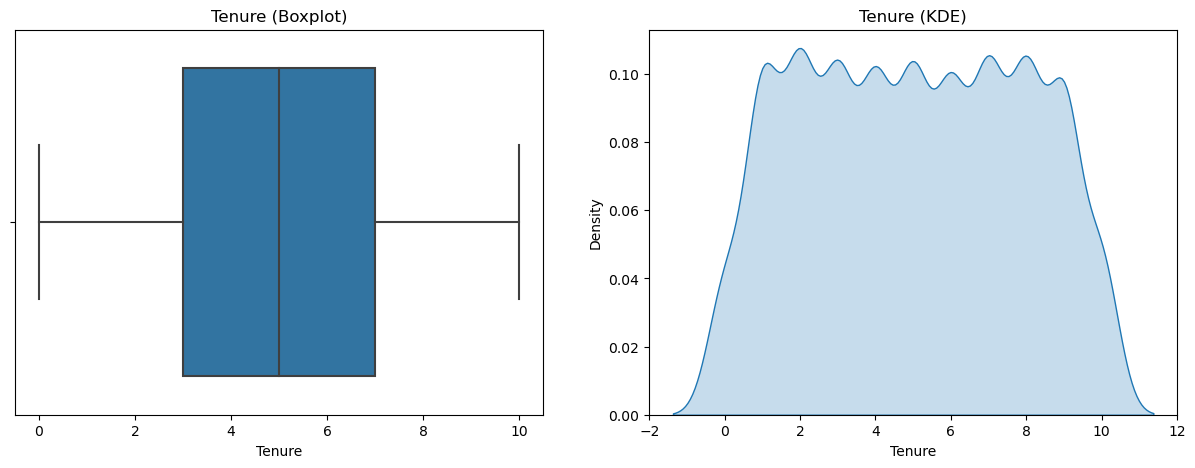

Tenure [Skewness]: 0.010989809189781041
Tenure [Kurtosis]: -1.1652426364413717
               value
count   10000.000000
mean    76485.889288
std     62397.405202
min         0.000000
25%         0.000000
50%     97198.540000
75%    127644.240000
max    250898.090000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


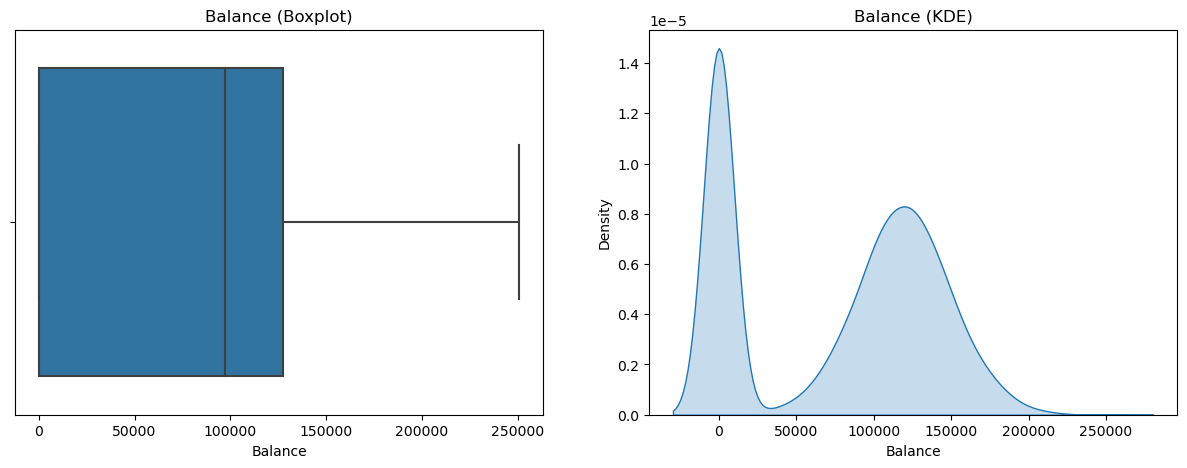

Balance [Skewness]: -0.14108754375291138
Balance [Kurtosis]: -1.489267106315331
              value
count  10000.000000
mean       1.530200
std        0.581654
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


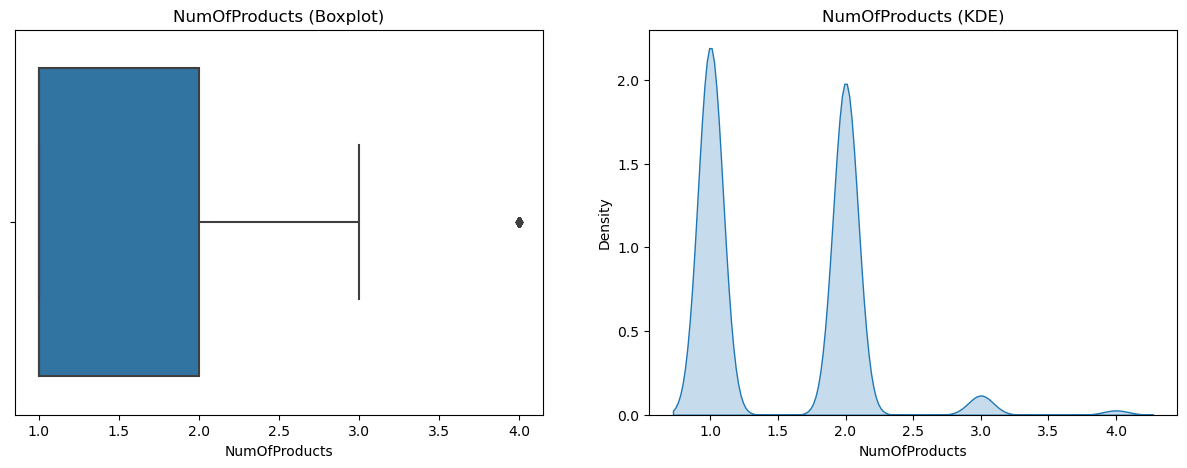

NumOfProducts [Skewness]: 0.745456048438949
NumOfProducts [Kurtosis]: 0.5820893733639854
             value
count  10000.00000
mean       0.70550
std        0.45584
min        0.00000
25%        0.00000
50%        1.00000
75%        1.00000
max        1.00000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


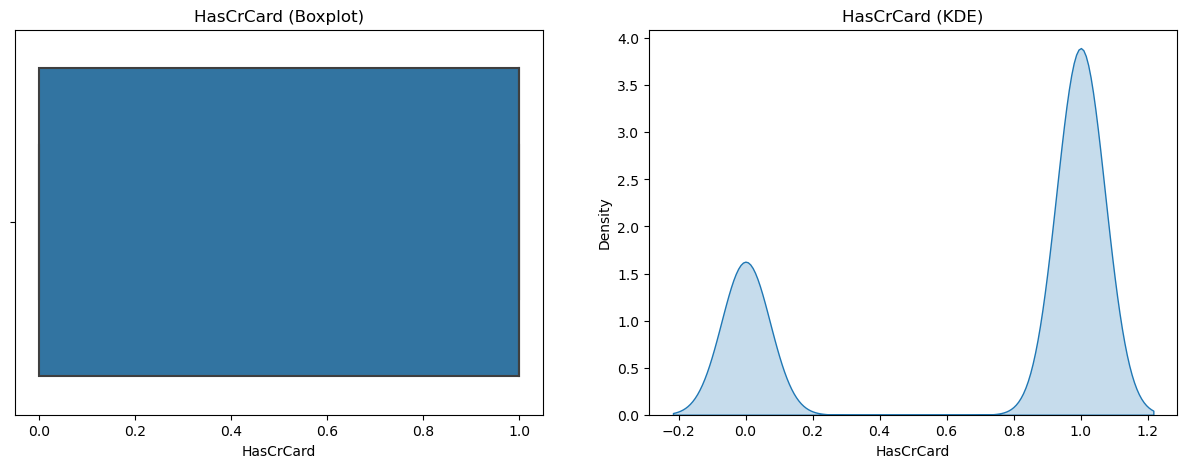

HasCrCard [Skewness]: -0.9016763178640548
HasCrCard [Kurtosis]: -1.18697981780312
              value
count  10000.000000
mean       0.515100
std        0.499797
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


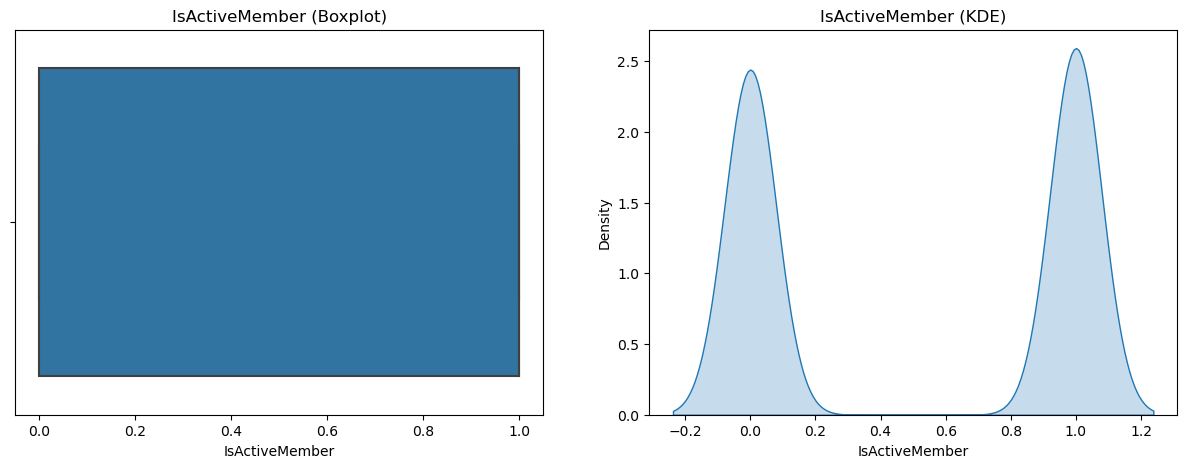

IsActiveMember [Skewness]: -0.06042756246298516
IsActiveMember [Kurtosis]: -1.996348509694782
               value
count   10000.000000
mean   100090.239881
std     57510.492818
min        11.580000
25%     51002.110000
50%    100193.915000
75%    149388.247500
max    199992.480000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


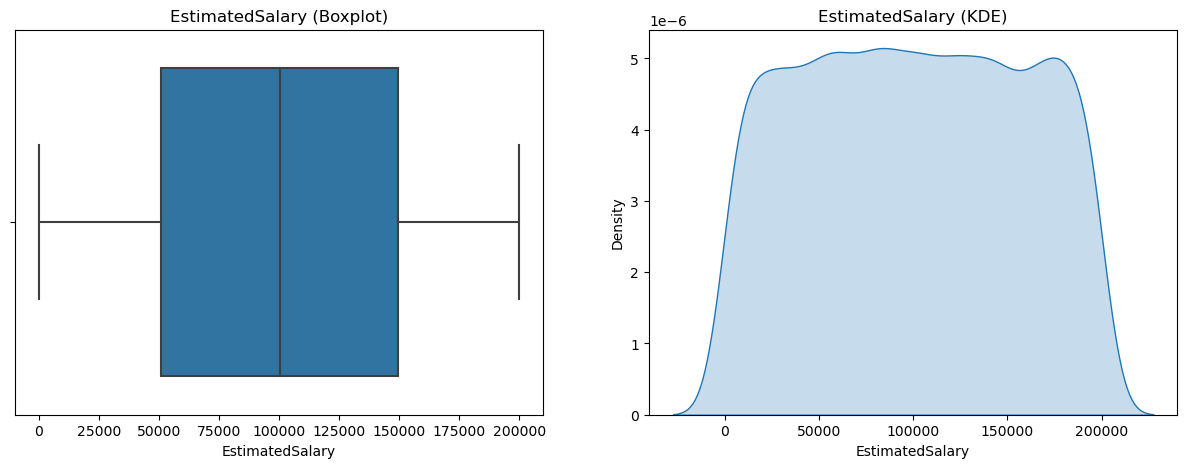

EstimatedSalary [Skewness]: 0.0020850448448748848
EstimatedSalary [Kurtosis]: -1.181527710874237
              value
count  10000.000000
mean       0.203700
std        0.402769
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


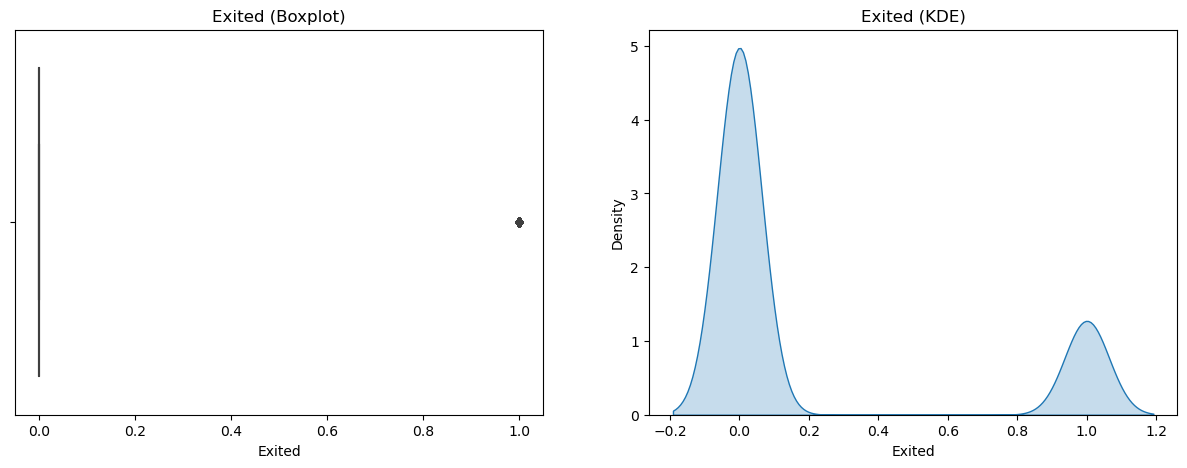

Exited [Skewness]: 1.4713899141398699
Exited [Kurtosis]: 0.16498827943253414


In [66]:
numeric_cols = [col for col in data.columns if data[col].dtype != "object"]
for col in numeric_cols:
    numeric_univariate(col)

In [97]:
from scipy.stats import skew, kurtosis
import scipy
def remove_outliers(col):
    const = 1.5
    iqr =scipy.stats.iqr(data[col]) * const
    q1 = np.quantile(data[col], 0.25)
    q3 = np.quantile(data[col], 0.77)
    lower = q1 - iqr
    upper = q3 + iqr
    return lower, upper

In [98]:
lower, upper = remove_outliers("CreditScore")

In [99]:
cleaned = data[(data["CreditScore"] < upper) & (data["CreditScore"] > lower)]

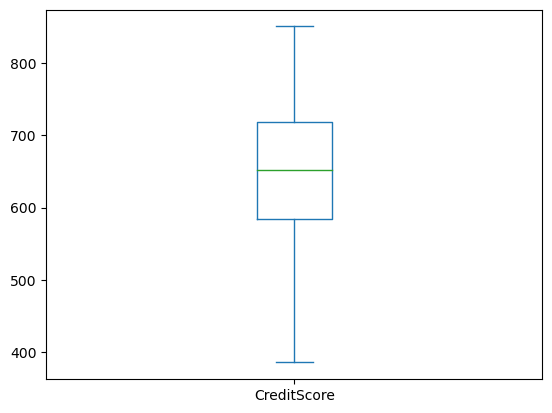

In [102]:
cleaned["CreditScore"].plot(kind="box")
plt.show()

In [100]:
def remove_outliers(data, column):
    # Calculate the IQR
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data_cleaned


In [54]:
data_cleaned = remove_outliers(data, 'CreditScore')


              value
count  10000.000000
mean     650.528800
std       96.653299
min      350.000000
25%      584.000000
50%      652.000000
75%      718.000000
max      850.000000


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3616595665.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ax=axes[1], data=data, x=column, shade=True)


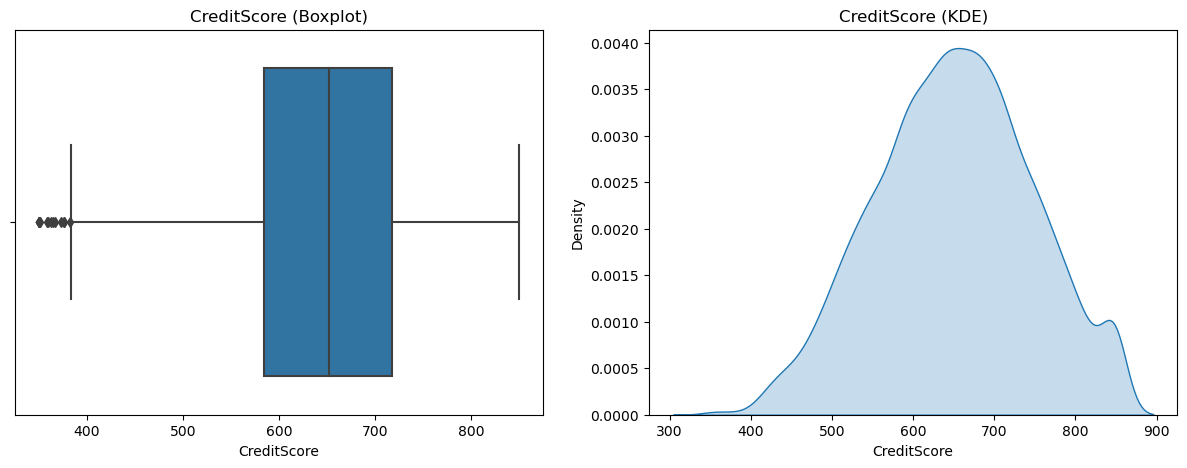

CreditScore [Skewness]: -0.07159586676212397
CreditScore [Kurtosis]: -0.42611279176518124


In [55]:
numeric_univariate("CreditScore")

# BI-Variate Analysis
Numerical-Numerical Variable Analysis

Scatter Plot
A scatter plot is a type or mathematical diagram using Cartesian coordinates to display values for typically two variables for a ste of data.
-It shows the relationship between the two variables.

C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\2517886250.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Greens')


<Axes: >

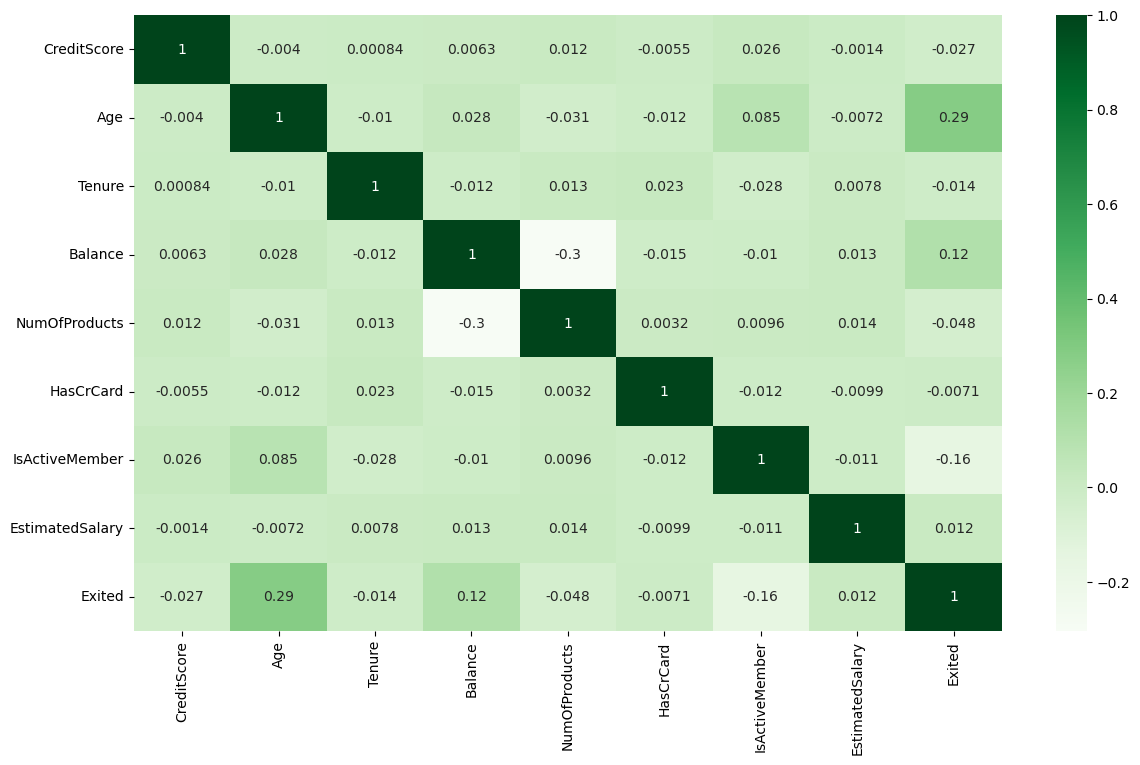

In [106]:
plt.figure(figsize=(14,8))
data.drop(["Age", "Balance", "Gender"], axis=1)
sns.heatmap(data.corr(), annot=True, cmap='Greens')

# 2 .Data Preprocessing

-Imputation (Missing Data)
-Categorical Encoding
-Handling Outliers
-Binning (Discretization)
-Scaling
-Log Transform
-Train_test_split
-Date-time


In [ ]:
#Imputation - some samples may miss data for some features. We may fill the empty slots with average feature value, or maximal feature value.

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [219]:
data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

In [220]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [203]:
data.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [ ]:
#Drop samples with missing values.

In [ ]:
#data_dropped = data.dropna(axis=0)
#data_dropped.isnull().sum()

In [ ]:
#Replacing Missing Values
#data['culmen_length_mm'].fillna((data['culmen_length_mm'].mean()), inplace=True)
#data['culmen_depth_mm'].fillna((data['culmen_depth_mm'].mean()), inplace=True)
#data['flipper_length_mm'].fillna((data['flipper_length_mm'].mean()), inplace=True)
#data['body_mass_g'].fillna((data['body_mass_g'].mean()), inplace=True)
#data['sex'].fillna((data['sex'].value_counts().index[0]), inplace=True)
#data.reset_index()
#data.head()

In [ ]:
##Inconsistencies
#data["sex"].value_counts()

# Categorical Encoding



In [79]:
#Encoding Categorical Data = machine learning models can work with numerical values.
#One way to improve your predictions is by applying clever ways when working with categorical vairables.
#These variables as the name suggests, have discrete values and represent some sort of category or class. For example color can be 
# categorical variable ('red', 'blue', 'green').

In [121]:
data["Geography"] = data["Geography"].astype('category')

data.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
dtype: object

Label Encoding

Is converting each categorical value into some number. For example, the 'Geography' feature contains 3 categories.

In [125]:
#category_data["Geography_cat"] = category_data["Geography"].cat.codes
#category_data["Gender_cat"] = category_data["Gender"].cat_codes

In [30]:
data['Geography'].unique()


array(['France', 'Spain', 'Germany'], dtype=object)

One-Hot Encoding

It spreads the values in a feature to multiple flag features and assigns values 0 or 1 to them. This binary value represents the relationship between non-encoded and encoded features.


In [31]:
encoded_geo = pd.get_dummies(data['Geography'])


cat_data = data.join(encoded_geo)

cat_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [32]:
cat_data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
data = pd.get_dummies(data,drop_first=True)

In [34]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


Handling Outliers
-Outliers are values that are deviating from the whole distribution of the data.
-Sometimes these values are mistakes and wrong measurements and should be removed from datasets.
-Sometimes they are valuable edge-case information.
-This means that sometimes we want to leave these values in the dataset, since they may carry some important information, while other times we want to remove those samples, because of the wrong iformation.

-We can use the inter-quartile range to detect these points, INter-quartile range or IQR indicates where 50 percent of data is located.
-When we are looking for this value we first look for the median, since it splits data into half.
-Then we are locating the median of the lower end of the data (denoted as Q1) and the median of the higher end of the data (denoted as Q3).
-Data between Q1 and Q3 is the IQR.

-Outliers are defined as samples that fall below Q1-1.5(IQR) or above Q3 + 1.5(IQR)
-We can do this using boxplot.


# Scaling

-Machine learning models make better predictions. Scaling is done for one simple reason, if features are not in the same range, they will be treated differently by the machine learning algorithm.
-If we have on e feature that has a range of values from 0-10 and another 0-100, a machine learning algorithm might deduce that the second feature is more important than the first one just because it has a higher value.
-That is why we use scaling, to put our numerical features into the same range.

Standard Scaling
StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie each value will be normalised by substracting the mean and diving by standard deviation. Use StandardScaler if you know the data distribution is normal.

In [156]:
scaled_data = data[["EstimatedSalary"]]

print('Mean:', scaled_data["EstimatedSalary"].mean())
print('Standard Deviation:', scaled_data["EstimatedSalary"].std())

Mean: 100090.239881
Standard Deviation: 57510.49281769822


In [166]:
sc = StandardScaler()
scaled_data["EstimatedSalary"] = sc.fit_transform(scaled_data[["EstimatedSalary"]])

print('Mean:', scaled_data["EstimatedSalary"].mean())
print('Standard Deviation:', scaled_data["EstimatedSalary"].std())
scaled_data["EstimatedSalary"]

Mean: -1.1901590823981679e-17
Standard Deviation: 1.00005000375031


C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\3767661982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_data["EstimatedSalary"] = sc.fit_transform(scaled_data[["EstimatedSalary"]])


0       0.021886
1       0.216534
2       0.240687
3      -0.108918
4      -0.365276
          ...   
9995   -0.066419
9996    0.027988
9997   -1.008643
9998   -0.125231
9999   -1.076370
Name: EstimatedSalary, Length: 10000, dtype: float64

# MinMax Scaler

# Log Transformation

# Date time

# 3. Feature Selection

Also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant 
features for use in model construction.
A feature in case of a dataset simply means a column.
Feature selection can be done in multiple ways but there are broadly 3 categories of it:.
    -filter method.
    -wrapper method
    -embedded method
    
Advantages:
    -it enables the machine learning algorithm to train faster:
    -it reduces complexity of a model and makes it easier to interpret.
    -it improves the accuracy of a model if the right subset is chosen.
    -it reduces overfitting.
    -reduces computational cost.

# Correlation Coefficient 

Correlation Coeefficient measures the linear relationship of two or more variables.
The logic behind using correlation for feature selection is that the good variables are highly correlated to the target.
Correlation is measured using Pearson's correlation.

C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\2517886250.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Greens')


<Axes: >

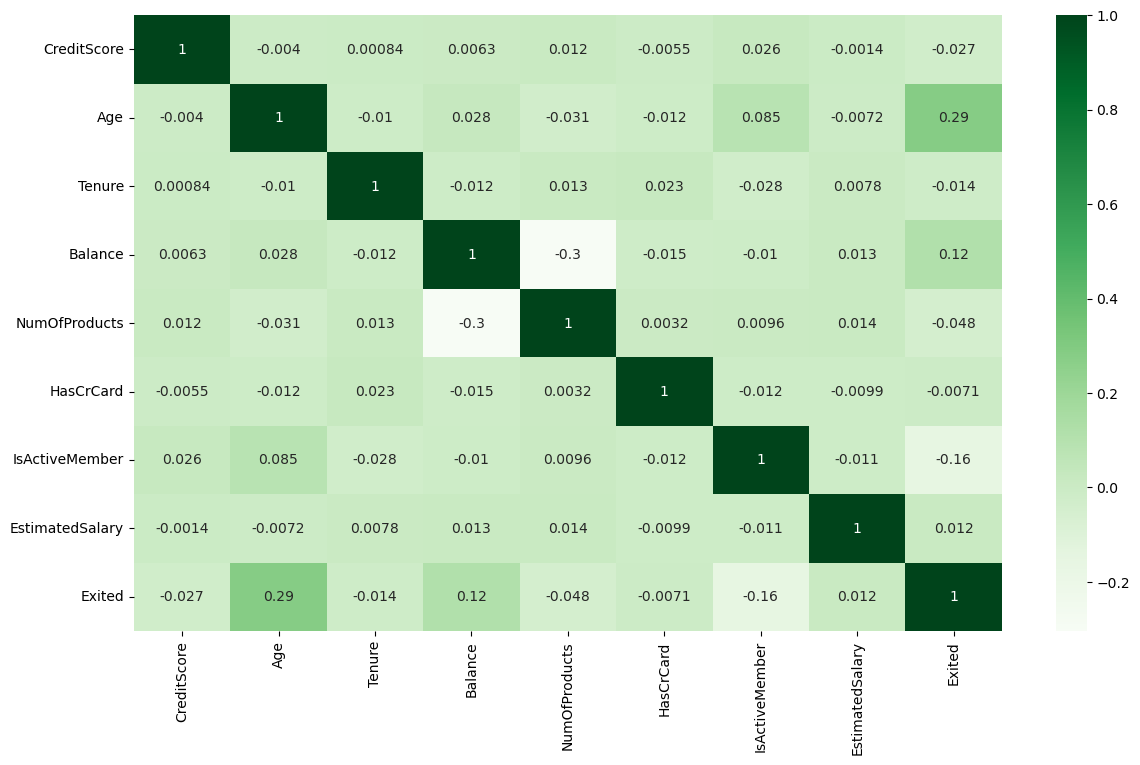

In [216]:
plt.figure(figsize=(14,8))
data.drop(["Age", "Balance", "Gender"], axis=1)
sns.heatmap(data.corr(), annot=True, cmap='Greens')

C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\227872890.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Exited'].plot(kind='bar')


<Axes: >

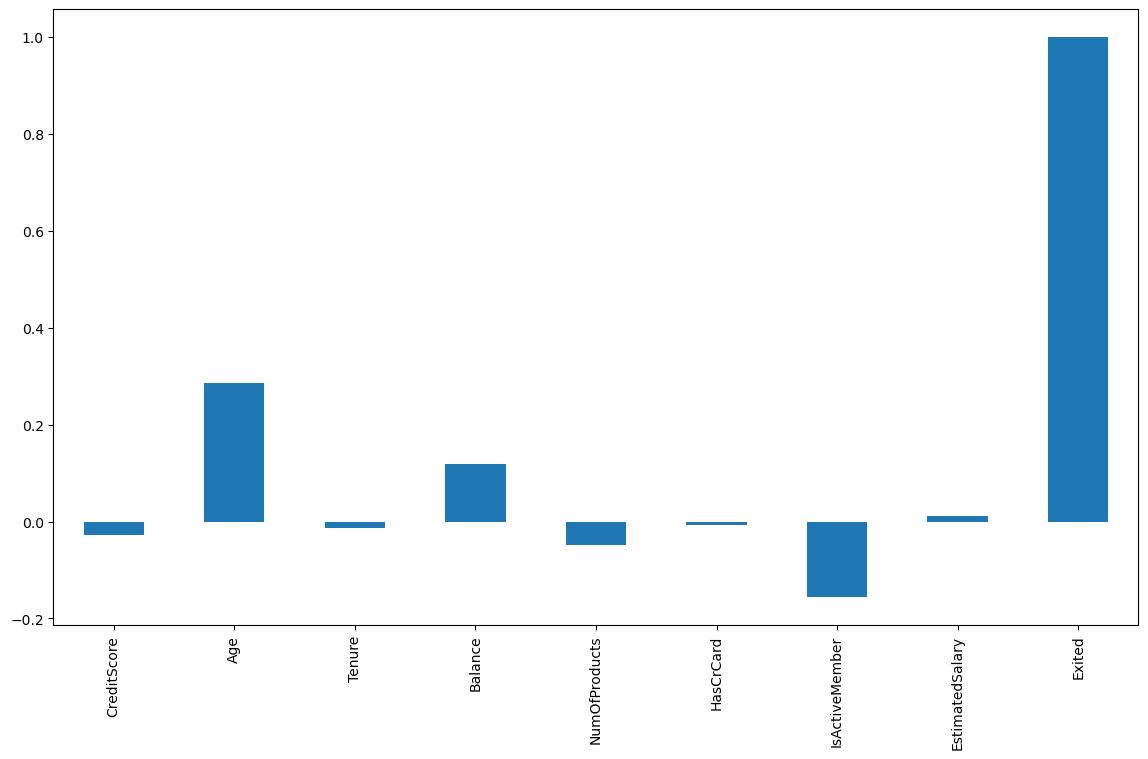

In [171]:
plt.figure(figsize=(14,8))
data.corr()['Exited'].plot(kind='bar')

In [177]:
#Correlation with output variable
cor = data.corr()
cor
cor_target = abs(cor['Exited'])
cor_target

C:\Users\SammyNgure\AppData\Local\Temp\ipykernel_5876\2610979672.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


CreditScore        0.027094
Age                0.285323
Tenure             0.014001
Balance            0.118533
NumOfProducts      0.047820
HasCrCard          0.007138
IsActiveMember     0.156128
EstimatedSalary    0.012097
Exited             1.000000
Name: Exited, dtype: float64

In [179]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Age               0.285323
Balance           0.118533
IsActiveMember    0.156128
Exited            1.000000
Name: Exited, dtype: float64

Wrapper Methods

In wrapper methods, the selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset.
Wrapper method generally results in better accuracy predictions.
There are different wrapper methods such as:
    Backward Elimination
    Forward Elimination.
    Bi-Directional Elimination
    RFE

In [185]:
!pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 944.3 kB/s eta 0:00:00


In [223]:
# Assuming 'df' is your DataFrame with columns for features and the target variable
#X_data = data.drop('Exited', axis=1)  # Drop the target variable column from the feature matrix
#y_data = data['Exited']  # Assign the target variable column to the target variable array


In [226]:
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.linear_model import LinearRegression
#sfs = SFS(LinearRegression(),
#         k_features = 5,
#         forward = True,
#         floating = False,
#         scoring = 'r2',
#         cv = 0 )
#sfs.fit(X_data, y_data)
#sfs.k_feature_names_

In [214]:
#Not Handling Imbalanced

In [227]:
model = LinearRegression()
model.fit(X_data, y_data)
model.coef_

array([-9.12775183e-05,  1.14202043e-02, -2.05459805e-03,  6.89333098e-07,
       -2.87824716e-03, -3.41805122e-03, -1.45221918e-01,  7.64665879e-08])

In [230]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model,n_features_to_select=10)
X_rfe = rfe.fit_transform(X_data,y_data)
#Fitting the data to model
model.fit(X_rfe, y_data)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


In [35]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [37]:
#sns.countplot(data['Exited'])

In [ ]:
X = data.drop('Exited', axis=1)
y = data['Exited']

In [ ]:
y

Handling Imbalanced Data With SMOTE

In [40]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [49]:
X_res.value_counts()

CreditScore  Age  Tenure  Balance        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  Gender_Male
350          39   0       109733.200000  2              0          0               123602.110000    1                  0                1              1
689          46   4       79171.697860   1              1          0               27402.810871     0                  1                0              1
             40   4       78119.590000   4              1          0               119259.340000    1                  0                0              1
                  5       154251.670000  1              0          1               118319.500000    0                  1                0              1
                  6       130209.582565  2              1          0               2544.757177      1                  0                0              1
                                                                                       

In [50]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Splitting The Dataset Into The Training Set And Test Set

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42,stratify=y)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20, random_state=42)

Feature Scaling

In [51]:
sc = StandardScaler()

In [52]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train

array([[-0.41695385,  0.40863191,  0.45042373, ..., -0.57408735,
        -0.46188022,  1.17794576],
       [ 1.0957397 ,  0.1072849 , -1.39175872, ..., -0.57408735,
        -0.46188022,  1.17794576],
       [-0.78696522, -0.59585812, -0.28644925, ..., -0.57408735,
        -0.46188022, -0.84893552],
       ...,
       [ 0.20335933,  0.2077339 ,  1.18729671, ..., -0.57408735,
        -0.46188022,  1.17794576],
       [ 0.46454383,  0.70997891, -0.65488574, ..., -0.57408735,
        -0.46188022, -0.84893552],
       [ 0.52983995,  1.01132592, -1.39175872, ...,  1.74189519,
        -0.46188022,  1.17794576]])

Logistic Regression

In [55]:
log = LogisticRegression()

In [56]:
log.fit(X_train,y_train)

LogisticRegression()

In [57]:
y_pred1 = log.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred1)

0.783427495291902

In [59]:
precision_score(y_test,y_pred1)

0.7718966603654694

In [60]:
precision_score(y_test,y_pred1)

0.7718966603654694

In [61]:
recall_score(y_test,y_pred1)

0.7887958789439794

In [62]:
recall_score(y_test,y_pred1)

0.7887958789439794

In [63]:
f1_score(y_test,y_pred1)

0.7802547770700636

In [64]:
f1_score(y_test,y_pred1)

0.7802547770700636

SVC

In [66]:
svm = svm.SVC()

In [67]:
svm.fit(X_train,y_train)

SVC()

In [73]:
y_pred2 = svm.predict(X_test)

In [74]:
accuracy_score(y_test,y_pred2)

0.8370998116760828

In [75]:
precision_score(y_test,y_pred2)

0.8305626598465473

KNeighbors Classifier

In [68]:
knn = KNeighborsClassifier()

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
y_pred3 = knn.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred3)

0.8245448838669177

In [72]:
precision_score(y_test,y_pred3)

0.8030487804878049

Decision Tree Classifier

In [76]:
dt = DecisionTreeClassifier()

In [77]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [87]:
y_pred4 = dt.predict(X_test)

In [88]:
accuracy_score(y_test,y_pred4)

0.7944130571249215

In [89]:
precision_score(y_test,y_pred4)

0.7771604938271605

Random Forest Classifier

In [90]:
rf = RandomForestClassifier()

In [91]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [92]:
y_pred5 = rf.predict(X_test)

In [93]:
accuracy_score(y_test,y_pred5)

0.8587570621468926

In [94]:
precision_score(y_test,y_pred5)

0.8510502864417568

Gradient Boosting Classifier

In [173]:
gbc = GradientBoostingClassifier()

In [174]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [175]:
y_pred6 = gbc.predict(X_test)

In [178]:
accuracy_score(y_test,y_pred6)

0.844632768361582

In [180]:
precision_score(y_test,y_pred6)

0.8391025641025641

Save The Model

In [95]:
X_res = sc.fit_transform(X_res)

In [96]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [97]:
joblib.dump(rf,'CRAG CHURN MODEL')

['CRAG CHURN MODEL']

In [98]:
model = joblib.load('CRAG CHURN MODEL')

In [ ]:
data.columns

In [109]:
#GUI

In [ ]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    if p9 == 1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9 == 2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9 == 3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1  
    p10=int(e10.get())
    model = joblib.load('CRAG CHURN MODEL')
    result=model.predict(sc.transform([[p1,p2,p3,p4,
                           p5,p6,
                           p7,p8,Geography_Germany,Geography_Spain,p10]]))
    
    if result == 0:
        Label(master, text="No Exit").grid(row=31)
    else:
        Label(master, text="Exit").grid(row=31)
    
    
master = Tk()
master.title("Bank Customers Churn Prediction Using Machine Learning")


label = Label(master, text = "Customers Churn Prediction Using ML"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="CreditScore").grid(row=1)
Label(master, text="Age").grid(row=2)
Label(master, text="Tenure").grid(row=3)
Label(master, text="Balance").grid(row=4)
Label(master, text="NumOfProducts").grid(row=5)
Label(master, text="HasCrCard").grid(row=6)
Label(master, text="IsActiveMember").grid(row=7)
Label(master, text="EstimatedSalary").grid(row=8)
Label(master, text="Geography").grid(row=9)
Label(master,text="Gender").grid(row=10)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10,column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()